In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import ta
import evaluation
import strategy

In [2]:
data = yf.download(
    "SPY",
    start="1990-01-01",
    end="2021-01-01",
    auto_adjust = True,
    group_by="Ticker",
)

[*********************100%***********************]  1 of 1 completed


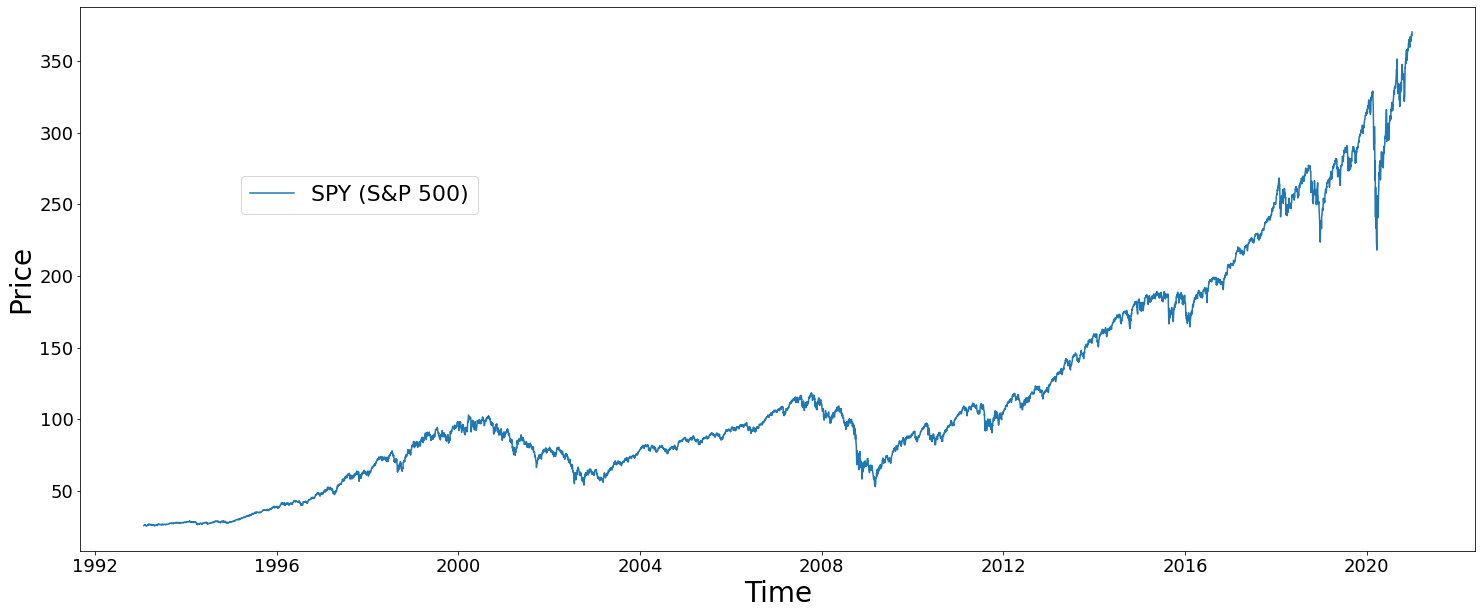

In [3]:
plt.figure(figsize=(25,10))

plt.plot(data['Close'], label='SPY (S&P 500)')

plt.legend(loc='lower center', bbox_to_anchor=(0.2, 0.6), fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Price', fontsize=28)

plt.show()

In [4]:
macd = ta.utils.dropna(data)
macd = ta.add_all_ta_features(macd, "Open", "High", "Low", "Close", "Volume", fillna=True)
macd = macd[["Open", "High", "Low", "Close", "Volume", 'trend_macd_diff', 'trend_macd', 'trend_macd_signal']]

/Users/qingweilan/.pyenv/versions/3.8.12/lib/python3.8/site-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/Users/qingweilan/.pyenv/versions/3.8.12/lib/python3.8/site-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


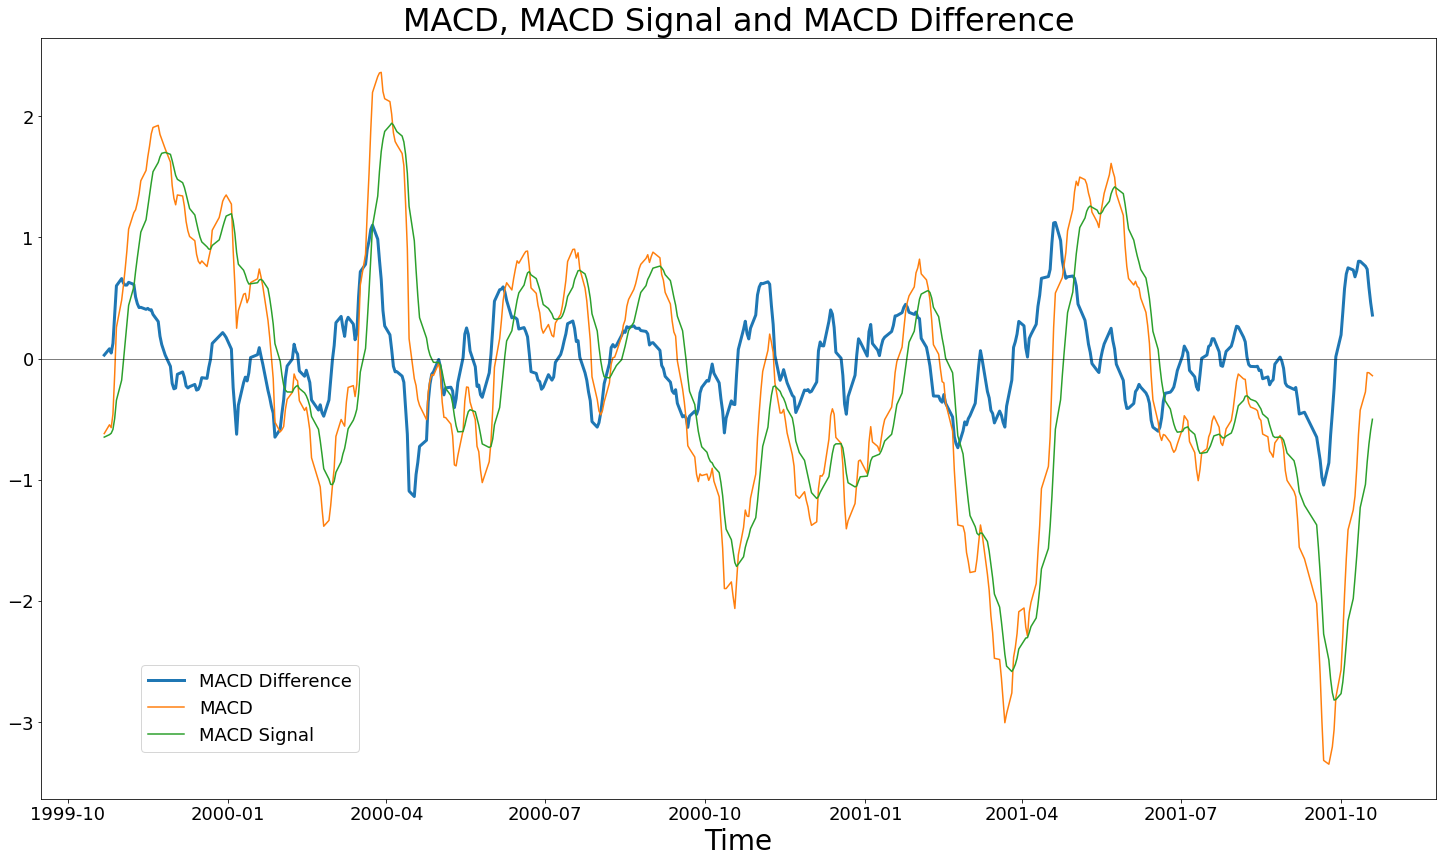

In [5]:
start, end = 1700, 2200

plt.figure(figsize=(25,14))

plt.plot(macd[start:end]['trend_macd_diff'], label='MACD Difference', linewidth=3)
plt.plot(macd[start:end]['trend_macd'], label='MACD')
plt.plot(macd[start:end]['trend_macd_signal'], label='MACD Signal')

plt.legend(loc='lower center', bbox_to_anchor=(0.15, 0.05), fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)

plt.axhline(0, color='black', linewidth=0.5)

plt.title('MACD, MACD Signal and MACD Difference', fontsize=32)

plt.show()

In [7]:
macd_perf = evaluation.eval(strategy.macd(data))

Performance: 176.58%


In [8]:
bh_perf = evaluation.eval(strategy.bh(data))

Performance: 98.84%


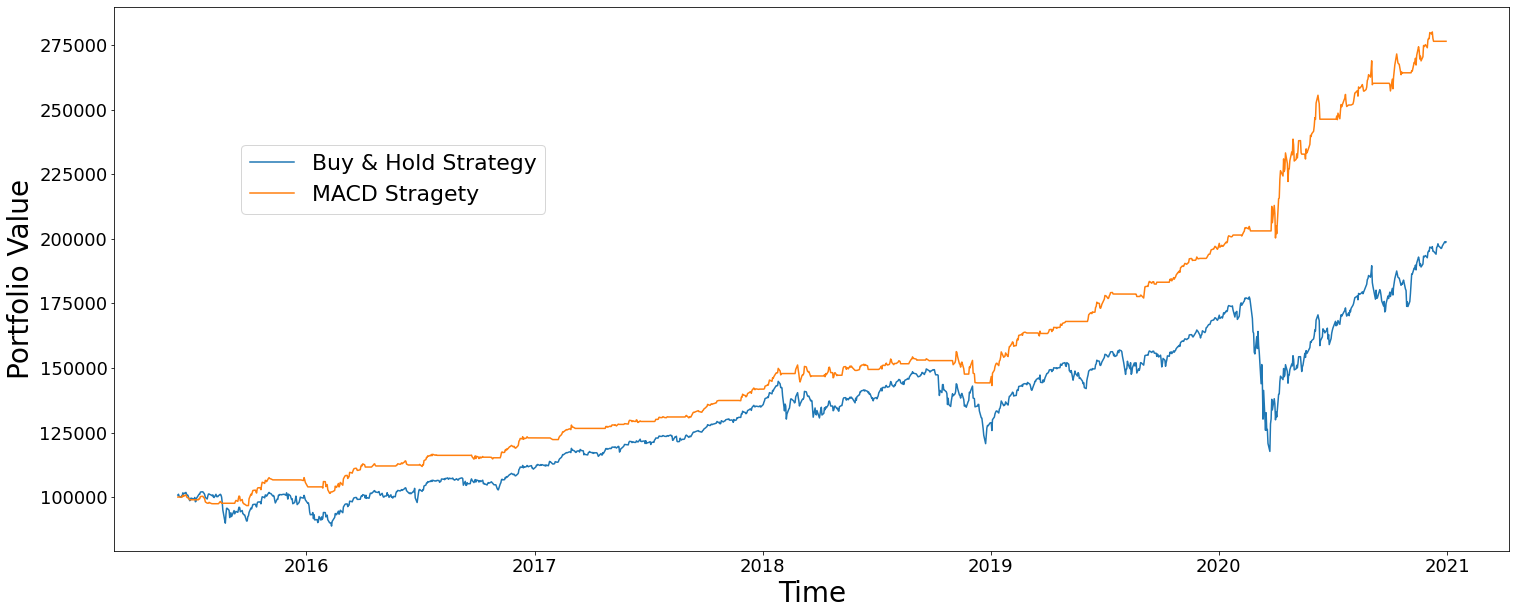

In [9]:
plt.figure(figsize=(25,10))

plt.plot(bh_perf['value'], label='Buy & Hold Strategy')
plt.plot(macd_perf['value'], label='MACD Stragety')

plt.legend(loc='lower center', bbox_to_anchor=(0.2, 0.6), fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Portfolio Value', fontsize=28)

plt.show()

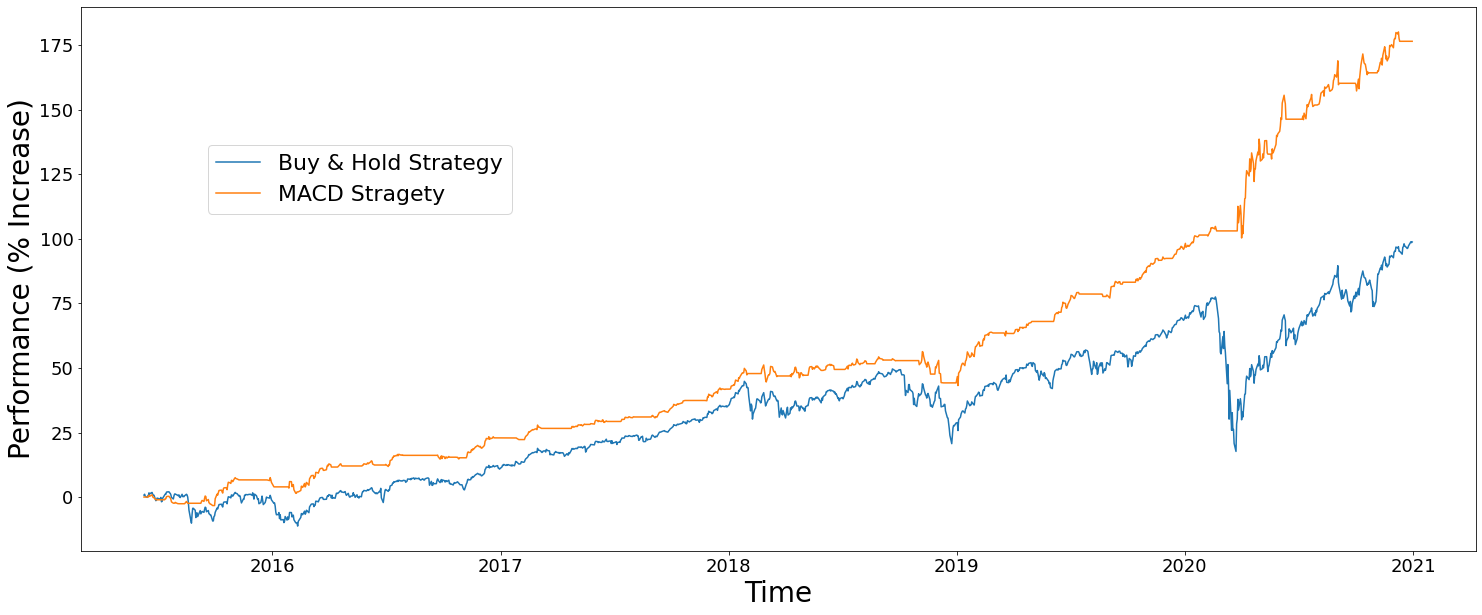

In [10]:
plt.figure(figsize=(25,10))

plt.plot(bh_perf['percentage'], label='Buy & Hold Strategy')
plt.plot(macd_perf['percentage'], label='MACD Stragety')

plt.legend(loc='lower center', bbox_to_anchor=(0.2, 0.6), fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Time', fontsize=28)
plt.ylabel('Performance (% Increase)', fontsize=28)

plt.show()